In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/stats (1).csv')
df

,"last_name, first_name",player_id,year,single,double,triple,home_run
0,"Walls, Taylor",670764,2024,31,5,3,1
1,"Altuve, Jose",514888,2024,134,31,0,20
2,"Hays, Austin",669720,2024,37,18,0,5
3,"Polanco, Jorge",593871,2024,62,11,0,16
4,"Tucker, Kyle",663656,2024,44,13,0,23
...,...,...,...,...,...,...,...
612,"Benson, Will",666181,2024,29,19,2,14
613,"Maile, Luke",571912,2024,18,4,0,2
614,"Thomas, Lane",657041,2024,68,26,3,15
615,"Kemp, Tony",643393,2024,0,0,0,0


In [3]:
number_df = df.drop('last_name, first_name', axis=1).drop('player_id', axis=1).drop('year', axis=1)
number_df

,single,double,triple,home_run
0,31,5,3,1
1,134,31,0,20
2,37,18,0,5
3,62,11,0,16
4,44,13,0,23
...,...,...,...,...
612,29,19,2,14
613,18,4,0,2
614,68,26,3,15
615,0,0,0,0


In [4]:
df_norm = number_df.divide(number_df.sum(axis=1), axis=0)
df_norm

,single,double,triple,home_run
0,0.775000,0.125000,0.075000,0.025000
1,0.724324,0.167568,0.000000,0.108108
2,0.616667,0.300000,0.000000,0.083333
3,0.696629,0.123596,0.000000,0.179775
4,0.550000,0.162500,0.000000,0.287500
...,...,...,...,...
612,0.453125,0.296875,0.031250,0.218750
613,0.750000,0.166667,0.000000,0.083333
614,0.607143,0.232143,0.026786,0.133929
615,NaN,NaN,NaN,NaN


In [5]:
df_norm.sum(axis=1)

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
612,1.0
613,1.0
614,1.0
615,0.0


In [6]:
inertia_values = []

In [7]:
for k in range(2, 31):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(number_df)
    inertia_values.append(kmeans.inertia_)

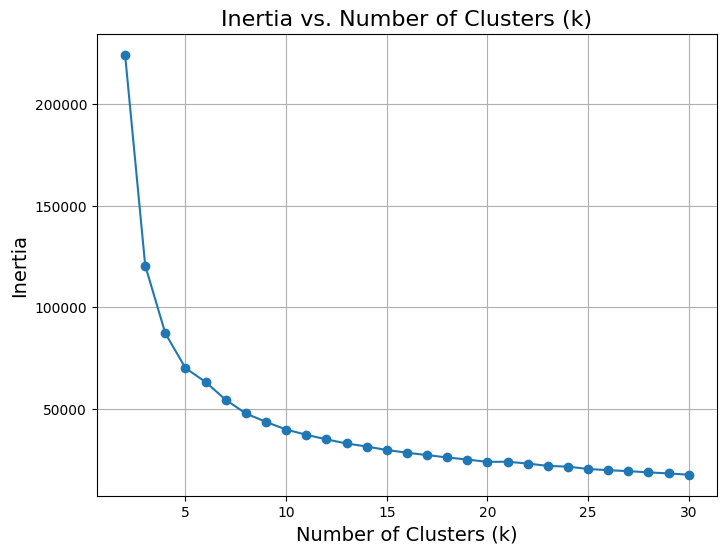

In [8]:
plt.figure(figsize=(8, 6))
plt.plot(range(2, 31), inertia_values, marker='o')
plt.title('Inertia vs. Number of Clusters (k)', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.grid(True)
plt.show()

In [49]:
kmeans = KMeans(n_clusters=8, random_state=0)
fit = kmeans.fit(number_df)

In [50]:
clusters = fit.labels_

In [51]:
df['Cluster'] = clusters

In [52]:
df

,"last_name, first_name",player_id,year,single,double,triple,home_run,Cluster
0,"Walls, Taylor",670764,2024,31,5,3,1,1
1,"Altuve, Jose",514888,2024,134,31,0,20,4
2,"Hays, Austin",669720,2024,37,18,0,5,1
3,"Polanco, Jorge",593871,2024,62,11,0,16,5
4,"Tucker, Kyle",663656,2024,44,13,0,23,3
...,...,...,...,...,...,...,...,...
612,"Benson, Will",666181,2024,29,19,2,14,1
613,"Maile, Luke",571912,2024,18,4,0,2,6
614,"Thomas, Lane",657041,2024,68,26,3,15,5
615,"Kemp, Tony",643393,2024,0,0,0,0,2


In [53]:
cluster_count = df['Cluster'].value_counts()
cluster_count

,count
Cluster,
2,147
6,95
1,91
3,89
5,83
7,49
0,37
4,26


In [54]:
simple_df = df[['last_name, first_name', 'Cluster']]
simple_df

,"last_name, first_name",Cluster
0,"Walls, Taylor",1
1,"Altuve, Jose",4
2,"Hays, Austin",1
3,"Polanco, Jorge",5
4,"Tucker, Kyle",3
...,...,...
612,"Benson, Will",1
613,"Maile, Luke",6
614,"Thomas, Lane",5
615,"Kemp, Tony",2


In [55]:
random_samples = simple_df.groupby('Cluster').apply(lambda x: x.sample(min(5, len(x))))
random_samples

<ipython-input-55-bc00f9df4a34>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  random_samples = simple_df.groupby('Cluster').apply(lambda x: x.sample(min(5, len(x))))


last_name, first_name  Cluster
Cluster                                     
0       460     Pasquantino, Vinnie        0
        278             Olson, Matt        0
        539              Bleday, JJ        0
        452              Soto, Juan        0
        13            Seager, Corey        0
1       241        Grandal, Yasmani        1
        210        Stallings, Jacob        1
        576          Suwinski, Jack        1
        0             Walls, Taylor        1
        612            Benson, Will        1
2       537          Pereda, Jhonny        2
        272              White, Eli        2
        54              Cook, Billy        2
        544         Teodosio, Bryce        2
        325          Stevenson, Cal        2
3       159          Rizzo, Anthony        3
        245          Siani, Michael        3
        286          Crawford, J.P.        3
        141         Toglia, Michael        3
        384        Vargas, Ildemaro        3
4       541      Contreras, William        4
        323  Guerrero Jr., Vladimir        4
        271         Tovar, Ezequiel        4
        30           Burleson, Alec        4
        478          Arenado, Nolan        4
5       15               Lux, Gavin        5
        609       Wade Jr., LaMonte        5
        101       McCutchen, Andrew        5
        502          Realmuto, J.T.        5
        437          Fermin, Freddy        5
6       613             Maile, Luke        6
        508           Wagaman, Eric        6
        6               Myers, Dane        6
        450             Nido, Tomás        6
        237          McGuire, Reese        6
7       410              Bohm, Alec        7
        307          McCarthy, Jake        7
        422            Wong, Connor        7
        292           Castro, Willi        7
        545          Vierling, Matt        7

In [56]:
dfwnames = df_norm
dfwnames['Player'] = df['last_name, first_name']
dfwnames['Cluster'] = clusters
with pd.option_context("display.max_rows", 1000):
    display(dfwnames)

,single,double,triple,home_run,Player,Cluster
0,0.775000,0.125000,0.075000,0.025000,"Walls, Taylor",1
1,0.724324,0.167568,0.000000,0.108108,"Altuve, Jose",4
2,0.616667,0.300000,0.000000,0.083333,"Hays, Austin",1
3,0.696629,0.123596,0.000000,0.179775,"Polanco, Jorge",5
4,0.550000,0.162500,0.000000,0.287500,"Tucker, Kyle",3
5,0.601562,0.195312,0.023438,0.179688,"Nimmo, Brandon",0
6,0.600000,0.240000,0.040000,0.120000,"Myers, Dane",6
7,0.480000,0.213333,0.066667,0.240000,"Carpenter, Kerry",1
8,0.703704,0.222222,0.012346,0.061728,"Moreno, Gabriel",3
9,0.670886,0.189873,0.025316,0.113924,"Estrada, Thairo",3


In [57]:
random = dfwnames.groupby('Cluster').apply(lambda x: x.sample(min(5, len(x))))
random

<ipython-input-57-064457d57a1c>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  random = dfwnames.groupby('Cluster').apply(lambda x: x.sample(min(5, len(x))))


single    double    triple  home_run                Player  \
Cluster                                                                     
0       591  0.625000  0.179688  0.023438  0.171875         Ramos, Heliot   
        498  0.570370  0.251852  0.007407  0.170370            Neto, Zach   
        257  0.531469  0.237762  0.034965  0.195804        Devers, Rafael   
        5    0.601562  0.195312  0.023438  0.179688        Nimmo, Brandon   
        509  0.521127  0.274648  0.014085  0.190141         Chapman, Matt   
1       120  0.562500  0.343750  0.000000  0.093750        Smith, Dominic   
        569  0.588235  0.156863  0.000000  0.254902        Casas, Triston   
        241  0.612245  0.204082  0.000000  0.183673      Grandal, Yasmani   
        480  0.616667  0.150000  0.033333  0.200000          Bauers, Jake   
        285  0.522727  0.318182  0.045455  0.113636          Mateo, Jorge   
2       528  0.700000  0.200000  0.000000  0.100000       Saggese, Thomas   
        472  0.785714  0.214286  0.000000  0.000000      Barnhart, Tucker   
        234  0.562500  0.187500  0.000000  0.250000     Maldonado, Martín   
        546  0.714286  0.142857  0.000000  0.142857           Abreu, José   
        151  0.800000  0.200000  0.000000  0.000000         Narváez, Omar   
3       91   0.604938  0.222222  0.012346  0.160494         Wells, Austin   
        401  0.670455  0.147727  0.068182  0.113636  Crow-Armstrong, Pete   
        87   0.565657  0.161616  0.090909  0.181818     Yastrzemski, Mike   
        212  0.692308  0.256410  0.000000  0.051282        Robles, Victor   
        578  0.625000  0.215909  0.000000  0.159091      Robert Jr., Luis   
4       515  0.672515  0.169591  0.017544  0.140351       Reynolds, Bryan   
        481  0.617486  0.169399  0.000000  0.213115        Ozuna, Marcell   
        137  0.782313  0.149660  0.006803  0.061224       Giménez, Andrés   
        271  0.573864  0.255682  0.022727  0.147727       Tovar, Ezequiel   
        541  0.628743  0.221557  0.011976  0.137725    Contreras, William   
5       584  0.623762  0.257426  0.000000  0.118812          McNeil, Jeff   
        549  0.780488  0.146341  0.036585  0.036585          Rojas, Johan   
        497  0.644231  0.153846  0.028846  0.173077    Mullins II, Cedric   
        425  0.610169  0.220339  0.008475  0.161017     Stephenson, Tyler   
        50   0.653846  0.163462  0.028846  0.153846        Marsh, Brandon   
6       47   0.850000  0.150000  0.000000  0.000000       Grissom, Vaughn   
        6    0.600000  0.240000  0.040000  0.120000           Myers, Dane   
        436  0.647059  0.264706  0.000000  0.088235            Call, Alex   
        534  0.694444  0.111111  0.055556  0.138889     Holliday, Jackson   
        522  0.862069  0.103448  0.000000  0.034483          Mead, Curtis   
7       219  0.766667  0.200000  0.008333  0.025000          Young, Jacob   
        574  0.761194  0.111940  0.029851  0.097015           Keith, Colt   
        269  0.705882  0.201681  0.000000  0.092437        Turner, Justin   
        517  0.662338  0.175325  0.012987  0.149351        Semien, Marcus   
        292  0.652174  0.224638  0.036232  0.086957         Castro, Willi   

             Cluster  
Cluster               
0       591        0  
        498        0  
        257        0  
        5          0  
        509        0  
1       120        1  
        569        1  
        241        1  
        480        1  
        285        1  
2       528        2  
        472        2  
        234        2  
        546        2  
        151        2  
3       91         3  
        401        3  
        87         3  
        212        3  
        578        3  
4       515        4  
        481        4  
        137        4  
        271        4  
        541        4  
5       584        5  
        549        5  
        497        5  
        425        5  
        50         5  
6       47         6  
        6          6 

In [65]:
cluster_mean = df.groupby('Cluster')[['single', 'double', 'triple', 'home_run']].mean()
cluster_mean

,single,double,triple,home_run
Cluster,,,,
0,82.648649,30.567568,2.729730,30.621622
1,32.153846,9.945055,0.901099,6.219780
2,5.000000,1.714286,0.156463,0.761905
3,50.584270,15.258427,1.449438,11.191011
4,114.423077,30.500000,2.615385,19.000000
5,67.819277,19.518072,1.590361,12.421687
6,16.715789,4.978947,0.431579,3.284211
7,91.244898,25.204082,2.448980,16.448980


In [66]:
plt_mean = cluster_mean.divide(cluster_mean.sum(axis=1), axis=0)
plt_mean

,single,double,triple,home_run
Cluster,,,,
0,0.563895,0.208556,0.018624,0.208925
1,0.653271,0.202054,0.018308,0.126367
2,0.655080,0.224599,0.020499,0.099822
3,0.644524,0.194417,0.018468,0.142591
4,0.687067,0.183141,0.015704,0.114088
5,0.669163,0.192582,0.015692,0.122563
6,0.657829,0.195940,0.016984,0.129246
7,0.674156,0.186218,0.018094,0.121532


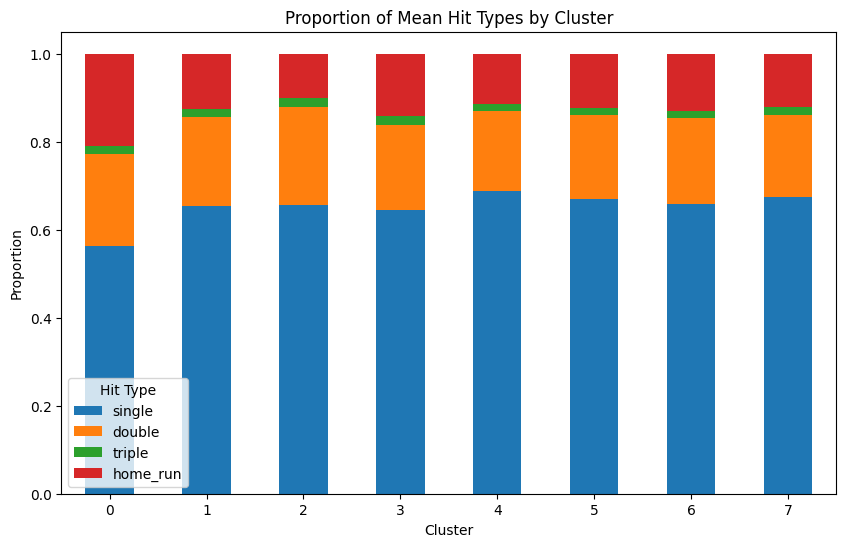

In [68]:
plt_mean.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Proportion of Mean Hit Types by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.legend(title='Hit Type')
plt.xticks(rotation=0)
plt.show()

In [58]:
cluster_med = df.groupby('Cluster')[['single', 'double', 'triple', 'home_run']].median()
cluster_med

,single,double,triple,home_run
Cluster,,,,
0,81.0,31.0,2.0,30.0
1,32.0,10.0,0.0,5.0
2,5.0,1.0,0.0,0.0
3,51.0,16.0,1.0,11.0
4,112.0,29.5,1.5,18.0
5,67.0,19.0,1.0,12.0
6,17.0,5.0,0.0,3.0
7,91.0,25.0,2.0,17.0


In [61]:
plt_med = cluster_med.divide(cluster_med.sum(axis=1), axis=0)
plt_med

,single,double,triple,home_run
Cluster,,,,
0,0.562500,0.215278,0.013889,0.208333
1,0.680851,0.212766,0.000000,0.106383
2,0.833333,0.166667,0.000000,0.000000
3,0.645570,0.202532,0.012658,0.139241
4,0.695652,0.183230,0.009317,0.111801
5,0.676768,0.191919,0.010101,0.121212
6,0.680000,0.200000,0.000000,0.120000
7,0.674074,0.185185,0.014815,0.125926


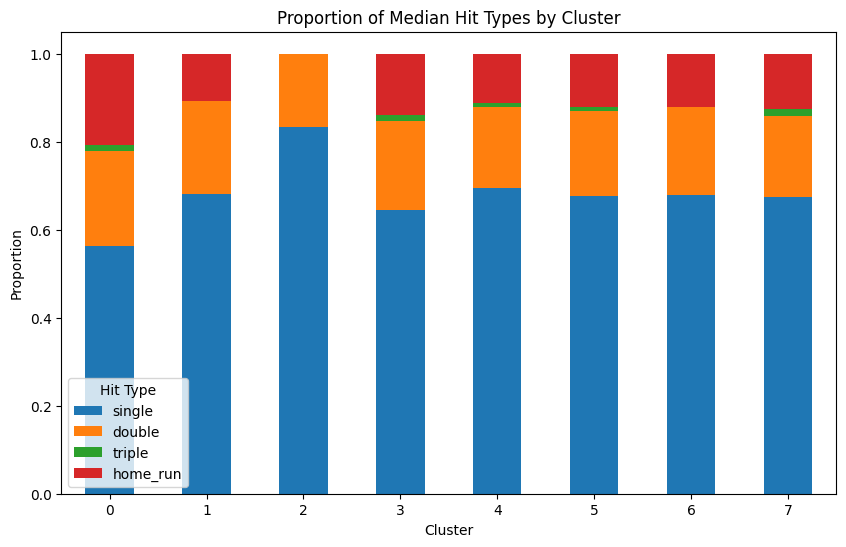

In [67]:
plt_med.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Proportion of Median Hit Types by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.legend(title='Hit Type')
plt.xticks(rotation=0)
plt.show()

In [64]:
cluster_std = df.groupby('Cluster')[['single', 'double', 'triple', 'home_run']].std()
cluster_std

,single,double,triple,home_run
Cluster,,,,
0,8.407061,6.470190,3.051854,9.062595
1,5.276622,4.495337,1.291467,4.027136
2,3.166607,1.809412,0.417111,1.042477
3,5.022244,4.911786,1.764622,6.354806
4,12.384419,8.281304,3.476515,8.442748
5,5.789276,5.227417,1.498260,6.557663
6,3.720739,2.596966,0.724240,2.897773
7,6.213328,5.693489,1.849113,5.454590


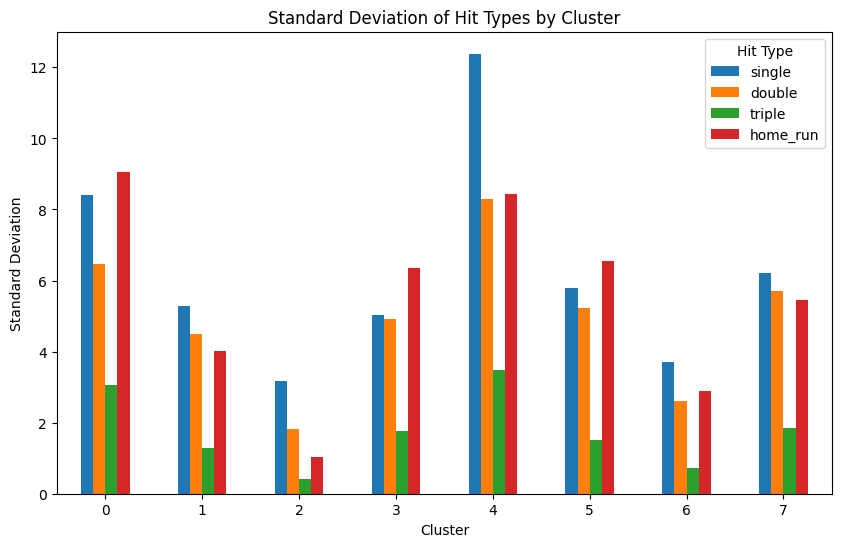

In [71]:
cluster_std.plot(kind='bar', figsize=(10, 6))
plt.title('Standard Deviation of Hit Types by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Standard Deviation')
plt.legend(title='Hit Type')
plt.xticks(rotation=0)
plt.show()